# IPL Socre Prediction (Comparing Lasso and Random Forest Regressors)


predicting the final score of a match.

### Steps:
- Importing Libraries and DataSet
- Data Analysis and Cleaning
- Data Preprocessing
- Model Building using ML models
- Comparing outcomes

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading our DataSet

In [3]:
df= pd.read_csv("ipl.csv")

In [4]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


The dataset consists of 15 columns:

mid: The match id to uniquely identify each match.

date: The date on which the match was held.

venue: The name of the stadium.

bat_team: The batting team name.

bowl_team: The bowling team name.

batsman: The name of the batsman.

bowler: The name of the bowler.

runs: The runs scored till now.

wickets: The wickets taken till now.

overs: The number of overs bowled.

runs_last_5: The number of runs scored in last 5 overs.

wickets_last_5: The number of wickets taken in last 5 overs.

striker: The name of the batsmen on the batting end.

non-striker: The name of the batsmen on the bowling end.

total: The total number of runs scored in the match.

Data Analysis and Cleaning


removing unwanted columns


In [5]:
unwanted_columns = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=unwanted_columns, axis=1, inplace=True)

In [6]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [7]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

selecting popular teams

In [8]:
selected_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [9]:
## Keeping only Selected teams in our Data Set
df = df[(df['bat_team'].isin(selected_teams)) & (df['bowl_team'].isin(selected_teams))]

removing first 5 overs of the match as they (arguably) don't have much significance on deciding which team will win the match.

In [11]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [12]:
# selected teams
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [13]:
# string to date-time object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [14]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


Data Preprocessing

In [15]:
# One-Hot-Encoding for our Categorical Variables

model_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [16]:
model_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,2008-04-18,1,0,0.1,1,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2008-04-18,1,0,0.2,1,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2008-04-18,2,0,0.2,2,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2008-04-18,2,0,0.3,2,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2008-04-18,2,0,0.4,2,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
model_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

Rearranging Columns

In [18]:
model_df = model_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

Splitting our Date into Train and Test Data

In [19]:
X_train = model_df.drop(labels='total', axis=1)[model_df['date'].dt.year <= 2016]
X_test = model_df.drop(labels='total', axis=1)[model_df['date'].dt.year >= 2017]

In [20]:
y_train = model_df[model_df['date'].dt.year <= 2016]['total'].values
y_test = model_df[model_df['date'].dt.year >= 2017]['total'].values

Now we have no need for our Data Column so we will drop it.

In [21]:
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [22]:
X_train.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0.1,1,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0.2,1,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0.2,2,0,2,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0.3,2,0,2,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0.4,2,0,2,0


Model Building

models used:
Lasso Regression
Random Forest Regression

We will be using Grid Search CV for Hypertuning our model

## Lasso Regression

Lasso Regression is a linear regression model that performs regularization by adding a penalty term to the loss function. 
This penalty term is proportional to the absolute value of the coefficients of the regression model.
The aim of the penalty term is to shrink the coefficient estimates towards zero, effectively selecting only the most important features in the dataset.

In [23]:
from sklearn.linear_model import Lasso

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
lasso=Lasso()

params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

In [26]:
# using GridSearchCV for HyperParameterTuning (alpha):
lasso_regressor=GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)

In [27]:
lasso_regressor.fit(X_train,y_train)

C:\Users\akhhe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.061e+06, tolerance: 3.436e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\akhhe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.334e+06, tolerance: 3.455e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\akhhe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.556e+06, toleranc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [28]:
print(lasso_regressor.best_params_)

{'alpha': 1}


In [29]:
lasso=Lasso(alpha =1)

In [30]:
lasso.fit(X_train,y_train)

Lasso(alpha=1)

In [31]:
pred= lasso.predict(X_test)

In [32]:
pred3= lasso.predict(X_train)

Evaluation

C:\Users\akhhe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

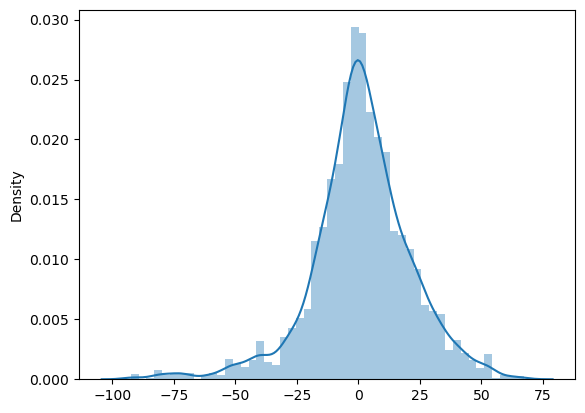

In [51]:
sns.distplot(y_test-pred)

C:\Users\akhhe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

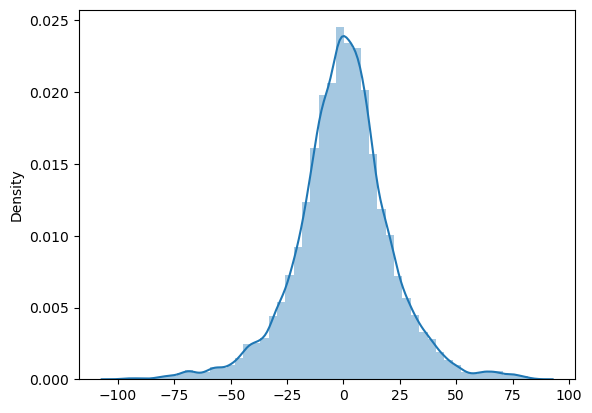

In [50]:
sns.distplot(y_train-pred3)

In [34]:
from sklearn import metrics

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 14.728109380088535
MSE: 414.59875954515394
RMSE: 20.361698346286193


In [48]:
print('MAE:', metrics.mean_absolute_error(y_train, pred3))
print('MSE:', metrics.mean_squared_error(y_train, pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, pred3)))

MAE: 15.486435505054578
MSE: 440.54928248393395
RMSE: 20.98926588720849


## Random Forest Regressor

Random Forest Regression, on the other hand, is a tree-based ensemble model that combines the predictions of multiple decision trees. It works by building a large number of decision trees on random subsets of the training data, and then averaging their predictions to make the final prediction.

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf = RandomForestRegressor()

In [38]:
from sklearn.model_selection import RandomizedSearchCV

defining Param

In [39]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 800, num = 4)]# no of trees
max_features = ['auto', 'sqrt'] # no of features to consider at every split

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 6)]
max_depth.append(None)

min_samples_split = [2, 5, 10]# Minimum no of samples required to split a node
min_samples_leaf = [1, 2, 4]# Minimum no of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree


In [40]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [41]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=1, random_state=42, n_jobs = -1)


In [42]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800]},
                   random_state=42, verbose=1)

In [43]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [44]:
pred1 = rf_random.predict(X_test)

In [45]:
pred4 = rf_random.predict(X_train)

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))

MAE: 16.045667334361475
MSE: 437.61064301774235
RMSE: 20.919145370156553


In [49]:
print('MAE:', metrics.mean_absolute_error(y_train, pred4))
print('MSE:', metrics.mean_squared_error(y_train, pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, pred4)))

MAE: 12.147235944202697
MSE: 297.7572426054159
RMSE: 17.255643789943505


C:\Users\akhhe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

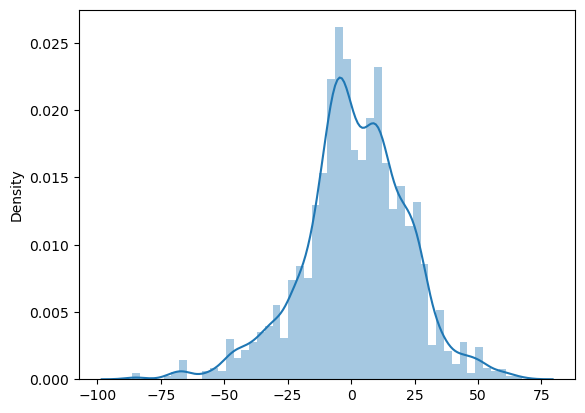

In [47]:
sns.distplot(y_test-pred1)

C:\Users\akhhe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

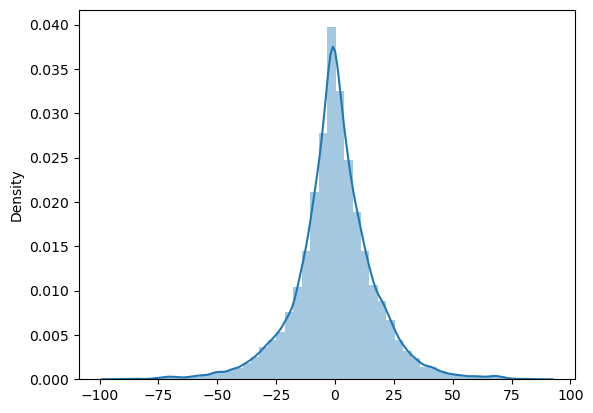

In [52]:
sns.distplot(y_train-pred4)

We are using three metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to compare both the models.
### Results:
#### Lasso-regressor on the test set:
`MAE: 12.214053814850248`

`MSE: 262.37973664007154`

`RMSE: 16.198139912967523`
#### Lasso-regressor on the train set:
`MAE: 15.486435505054578`

`MSE: 440.54928248393395`

`RMSE: 20.98926588720849`

#### Random-Forest-regressor on test set:
`MAE: 16.045667334361475`

`MSE: 437.61064301774235`

`RMSE: 20.919145370156553`
#### Random-Forest-regressor on train set:
`MAE: 12.147235944202697`

`MSE: 297.7572426054159`

`RMSE: 17.255643789943505`

### Observations:
Looking at the metrics, we can see that the Lasso Regression model outperformed the Random Forest Regression model in all three metrics. The MAE and RMSE values for the Lasso Regression model are lower, indicating that it makes better predictions on average and has smaller prediction errors. Similarly, the MSE value for the Lasso Regression model is lower, indicating that its predictions are more accurate overall.

### Possible Liabilities:
Problems that may arise with Lasso Regression include a possible bias towards zero coefficients and the selection of the regularisation parameter, which determines the severity of the penalty term. However, Random Forest Regression may underperform on datasets with high dimensionality or a large number of categorical variables, and overfitting may occur if the number of trees is too big.

## Conclusion:
Which model is superior is determined by the specific dataset and the goals of the analysis. If the dataset has many features and it is important to identify the most important ones, Lasso Regression is a good choice. Random Forest Regression, on the other hand, is a good choice if the dataset contains a mix of categorical and continuous variables, and the relationships between the features and the target variable are complex and nonlinear.